<a href="https://colab.research.google.com/github/TheDataFestAI/Learning_Resources/blob/main/learning_poc/1st_AI_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My first AI/ML Project**

## Reference:

1. https://www.youtube.com/watch?v=29ZQ3TDGgRQ&t=483s

### Other Resources:

1. blogs:
    1. https://towardsdatascience.com/how-to-build-a-machine-learning-model-439ab8fb3fb1
2. scikit learn:
    1. https://scikit-learn.org/stable/

# **Load Data:**

In [8]:
import pandas as pd

data_source_url = "https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv"

df = pd.read_csv(data_source_url)

In [9]:
print(f"Dataframe created with size, {df.shape}")

Dataframe created with size, (1144, 5)


# **Data Preparation:**

## **Data separation as X and y:**

In [10]:
y = df["logS"]

In [11]:
print(f"output/dependent data y has been separated with size, {y.shape}")

output/dependent data y has been separated with size, (1144,)


In [12]:
X = df.drop("logS", axis=1)

In [13]:
print(f"independent data X has been separated with size, {X.shape}")

independent data X has been separated with size, (1144, 4)


## **Data Splitting:**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)  # random_state will help to get the same data split

In [16]:
print(f"Size of X_train is {X_train.shape} and percentage of data: {round((X_train.shape[0]/df.shape[0])*100, 2)}")
print(f"Size of X_test is {X_test.shape} and percentage of data: {round((X_test.shape[0]/df.shape[0])*100, 2)}")

Size of X_train is (915, 4) and percentage of data: 79.98
Size of X_test is (229, 4) and percentage of data: 20.02


# **Model Building:**

## **Linear Regression:**

### **Training The Model:**

In [17]:
from sklearn.linear_model import LinearRegression

# create the LinearRegression model
lr = LinearRegression()

# trained the model with training dataset
lr.fit(X_train, y_train)

LinearRegression()

### **Predict from the Model:**

In [18]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [20]:
# print("Predicted Values")
# print(f"y_lr_train_pred, {y_lr_train_pred.shape}")
# print(f"y_lr_test_pred, {y_lr_test_pred.shape}")

Predicted Values
y_lr_train_pred, (915,)
y_lr_test_pred, (229,)


### **Evaluate Model Performance:**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [23]:
# print(f"LR MSE (Train): {lr_train_mse}, LR R2 (Train): {lr_train_r2}")
# print(f"LR MSE (Test): {lr_test_mse}, LR R2 (Test): {lr_test_r2}")

LR MSE (Train): 1.0075362951093687, LR R2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861033, LR R2 (Test): 0.7891616188563282


In [30]:
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]

In [31]:
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest:**

### **Training The Model:**

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Predict from the Model:**

In [33]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate Model Performance:**

In [34]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [35]:
rf_results = pd.DataFrame(["Random Forest Reg", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]

In [36]:
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest Reg,1.028228,0.759669,1.407688,0.709223


# **Model Comparison:**

In [42]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)

In [43]:
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest Reg,1.028228,0.759669,1.407688,0.709223


# **Data Visualization of Predicted Result:**

Text(0.5, 0, 'Experimental LogS')

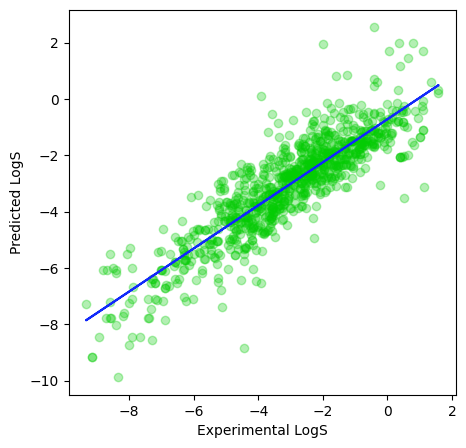

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
# c: change the color
# alpha: outer point will be grayed
plt.scatter(x=y_train, y=y_lr_train_pred, c="#04cc04", alpha=0.3)

# generate trend line
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#1129fa")
plt.ylabel("Predicted LogS")
plt.xlabel("Experimental LogS")

# What we have learnt here:


Id | Topic | Description | Remarks
:- | :---- | :---------- | :------
1. | **load the data** | `pd.read_csv()` | ✅
2. | **Data separation** as X and y | X are independent varible<br>y is dependent/output variable | ✅
3. | **Data Splitting** | `from sklearn.model_selection import train_test_split` <br> `train_test_split(X, y, test_size=0.2, random_state=100)` | ✅
4. | **Traing the model**<br> *- Linear Regression* | `from sklearn.linear_model import LinearRegression` <br> `lr = LinearRegression()` <br> `lr.fit(X_train, y_train)` | ✅
5. | **Predict the model** | `y_lr_train_pred = lr.predict(X_train)` <br> `y_lr_test_pred = lr.predict(X_test)` | ✅
6. | **Evaluate model performance** | `from sklearn.metrics import mean_squared_error, r2_score` <br> `mean_squared_error(<true_value>,<predict_value>)` | ✅
7. | **Traing the model**<br>*- Random Forest Regression* | `from sklearn.ensemble import RandomForestRegressor` <br> `RandomForestRegressor(max_depth=2, random_state=100)`<br> | ✅
8. | **Visualize the data** | `import matplotlib.pyplot as plt` <br> `plt.scatter(x=y_train, y=y_lr_train_pred` <br> `plt.plot()` | ✅
